In [1]:
#pip install squarify

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import squarify
import os

In [2]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [3]:
df = pd.read_csv('2019-Nov.csv')

In [4]:
df.head(15)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
5,2019-11-01 00:00:01 UTC,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c
6,2019-11-01 00:00:01 UTC,view,1306421,2053013558920217191,computers.notebook,hp,514.56,514028527,df8184cc-3694-4549-8c8c-6b5171877376
7,2019-11-01 00:00:02 UTC,view,15900065,2053013558190408249,NaN,rondell,30.86,518574284,5e6ef132-4d7c-4730-8c7f-85aa4082588f
8,2019-11-01 00:00:02 UTC,view,12708937,2053013553559896355,NaN,michelin,72.72,532364121,0a899268-31eb-46de-898d-09b2da950b24
9,2019-11-01 00:00:02 UTC,view,1004258,2053013555631882655,electronics.smartphone,apple,732.07,532647354,d2d3d2c6-631d-489e-9fb5-06f340b85be0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501979 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB


In [6]:
df.shape

(67501979, 9)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
product_id,67501979.0,1.251406e+07,1.725741e+07,1.000365e+06,1.305977e+06,5.100568e+06,1.730075e+07,1.000286e+08
category_id,67501979.0,2.057898e+18,2.012549e+16,2.053014e+18,2.053014e+18,2.053014e+18,2.053014e+18,2.187708e+18
price,67501979.0,2.924593e+02,3.556745e+02,0.000000e+00,6.924000e+01,1.657700e+02,3.603400e+02,2.574070e+03
user_id,67501979.0,5.386397e+08,2.288516e+07,1.030022e+07,5.164762e+08,5.350573e+08,5.610794e+08,5.799699e+08


In [8]:
df.isna().sum() / df.shape[0] *100

event_time        0.000000
event_type        0.000000
product_id        0.000000
category_id       0.000000
category_code    32.440784
brand            13.664900
price             0.000000
user_id           0.000000
user_session      0.000015
dtype: float64

In [9]:
df.dropna(axis=0, how="any", inplace=True)

In [10]:
df.shape

(42089564, 9)

In [11]:
# event_type dağılımı
e_type=df.groupby('event_type').size().reset_index(name='total')
e_type.head(3)

,event_type,total
0,cart,2115082
1,purchase,659256
2,view,39315226


In [12]:
# unique kullanıcı ve ürün sayısı
print("Number of unique user: ",df['user_id'].nunique())
print("Number of unique product: ",df['product_id'].nunique())
print("Number of unique product: ",df['user_session'].nunique())

Number of unique user:  2862935
Number of unique product:  69773
Number of unique product:  9540641


In [13]:
# unique kategori ve marka sayısı
print("Number of unique category: ",df['category_code'].nunique())
print("Number of unique brand: ",df['brand'].nunique())

Number of unique category:  129
Number of unique brand:  1987


In [14]:
# Kategori içerisinde bulunan ürün dağılımı
c_type = df.groupby('user_session').size().reset_index(name='total_category')
c_type.sort_values(by='total_category', ascending=False)[:10].reset_index(drop=True)

,user_session,total_category
0,0c307610-aa79-bf12-4ada-323af26b44b9,623
1,d99d91bf-40f8-4e29-9593-54b4a1826542,540
2,3a1a8cae-b7bd-444d-8aaa-48c7b14571e9,534
3,0b1c58be-29a4-4bb1-909f-07211e51ed55,420
4,8df977a5-d876-4a0b-adad-940c388ad410,387
5,9de43f36-3151-4708-b1e8-e63ed70bfdaf,378
6,3abf600c-1c37-4582-91f2-66fd1f999c51,372
7,123c2880-3db4-4f69-b2aa-9c67d366d6b7,351
8,fc749a4e-c432-4dae-a0a1-04de89f1e4ea,346
9,eefe97d8-7901-4a45-9a75-616424817d60,315


In [15]:
df[df["event_type"] == "purchase"]


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
168,2019-11-01 00:01:04 UTC,purchase,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d
707,2019-11-01 00:04:51 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,128.42,562958505,0f039697-fedc-40fa-8830-39c1a024351d
939,2019-11-01 00:06:33 UTC,purchase,1801881,2053013554415534427,electronics.video.tv,samsung,488.80,557746614,4d76d6d3-fff5-4880-8327-e9e57b618e0e
942,2019-11-01 00:06:34 UTC,purchase,5800823,2053013553945772349,electronics.audio.subwoofer,nakamichi,123.56,514166940,8ef5214a-86ad-4d0b-8df3-4280dd411b47
1107,2019-11-01 00:07:38 UTC,purchase,30000218,2127425436764865054,construction.tools.welding,magnetta,254.78,515240495,0253151d-5c84-4809-ba02-38ac405494e1
...,...,...,...,...,...,...,...,...,...
67501716,2019-11-30 23:58:08 UTC,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,235.60,574868869,878a1538-ebe3-4d7f-b773-1b057b1971eb
67501725,2019-11-30 23:58:14 UTC,purchase,1004874,2053013555631882655,electronics.smartphone,samsung,346.70,547804983,717566cf-ef93-4078-ba8f-169a3ac9f1a0
67501745,2019-11-30 23:58:22 UTC,purchase,1005130,2053013555631882655,electronics.smartphone,apple,1437.02,515582054,829c20b5-696e-4a8a-8a9f-171014a3ecbe
67501824,2019-11-30 23:58:57 UTC,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,235.60,579876821,ca50e291-43f3-4ca2-9e13-20ee6b8b25f0


In [16]:
df[(df["user_session"]=='a65116f4-ac53-4a41-ad68-6606788e674c') & (df["event_type"] == "purchase")]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
67501863,2019-11-30 23:59:15 UTC,purchase,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c


In [17]:
# Marka içerisinde bulunan ürün dağılımı
df.groupby('brand').size().reset_index(name='total_brand').sort_values(by='total_brand', ascending=False)[:10].reset_index(drop=True)

,brand,total_brand
0,samsung,7733327
1,apple,6213900
2,xiaomi,4138112
3,huawei,1384154
4,lg,1024251
5,oppo,811698
6,respect,732666
7,lenovo,727279
8,acer,698910
9,bosch,605523


In [18]:
df['event_time'] = pd.to_datetime(df['event_time']).dt.strftime('%w')
day =['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']
type_time = df.groupby(['event_time','event_type']).size().reset_index(name='total')
type_time.head(15)

,event_time,event_type,total
0,0,cart,409902
1,0,purchase,183486
2,0,view,6602156
3,1,cart,166873
4,1,purchase,73543
5,1,view,4309860
6,2,cart,157271
7,2,purchase,68077
8,2,view,4106434
9,3,cart,160203


## Data Visualization

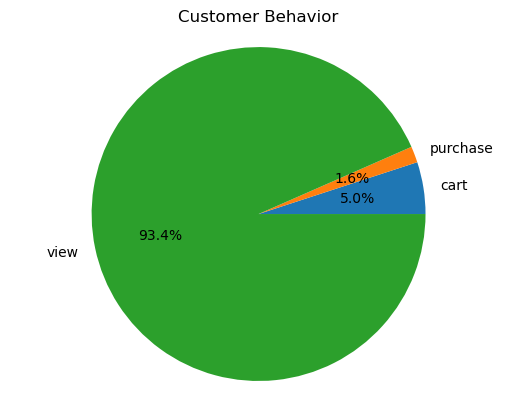

In [19]:
plt.pie(e_type['total'],labels=e_type['event_type'],autopct='%1.1f%%')
plt.title('Customer Behavior')
plt.axis('equal')
plt.show()

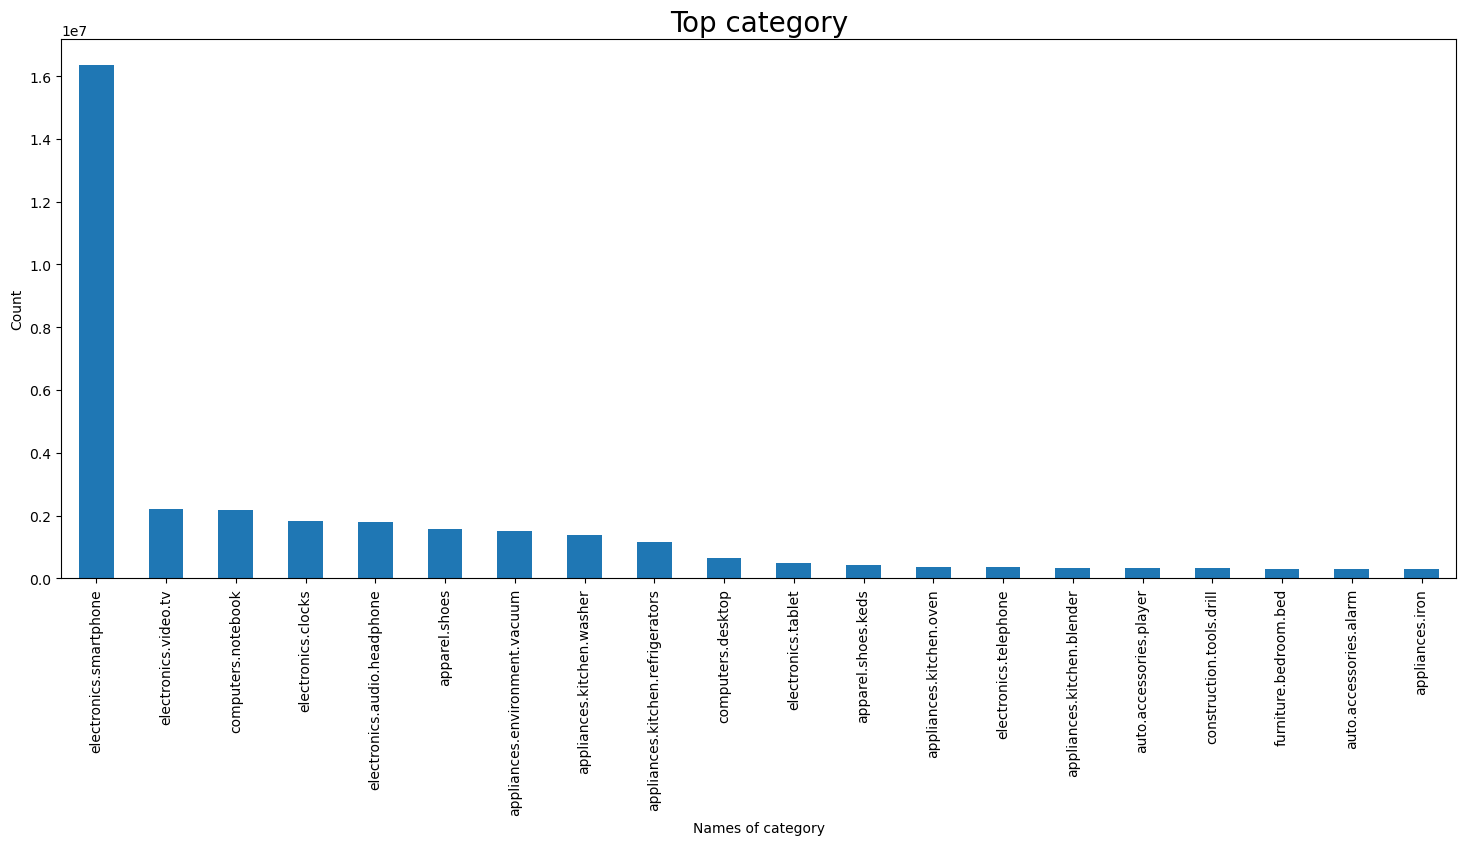

In [20]:
df['category_code'].value_counts().head(20).plot.bar(figsize = (18,7))
plt.title('Top category',fontsize = 20)
plt.xlabel('Names of category')
plt.ylabel('Count')
plt.show()

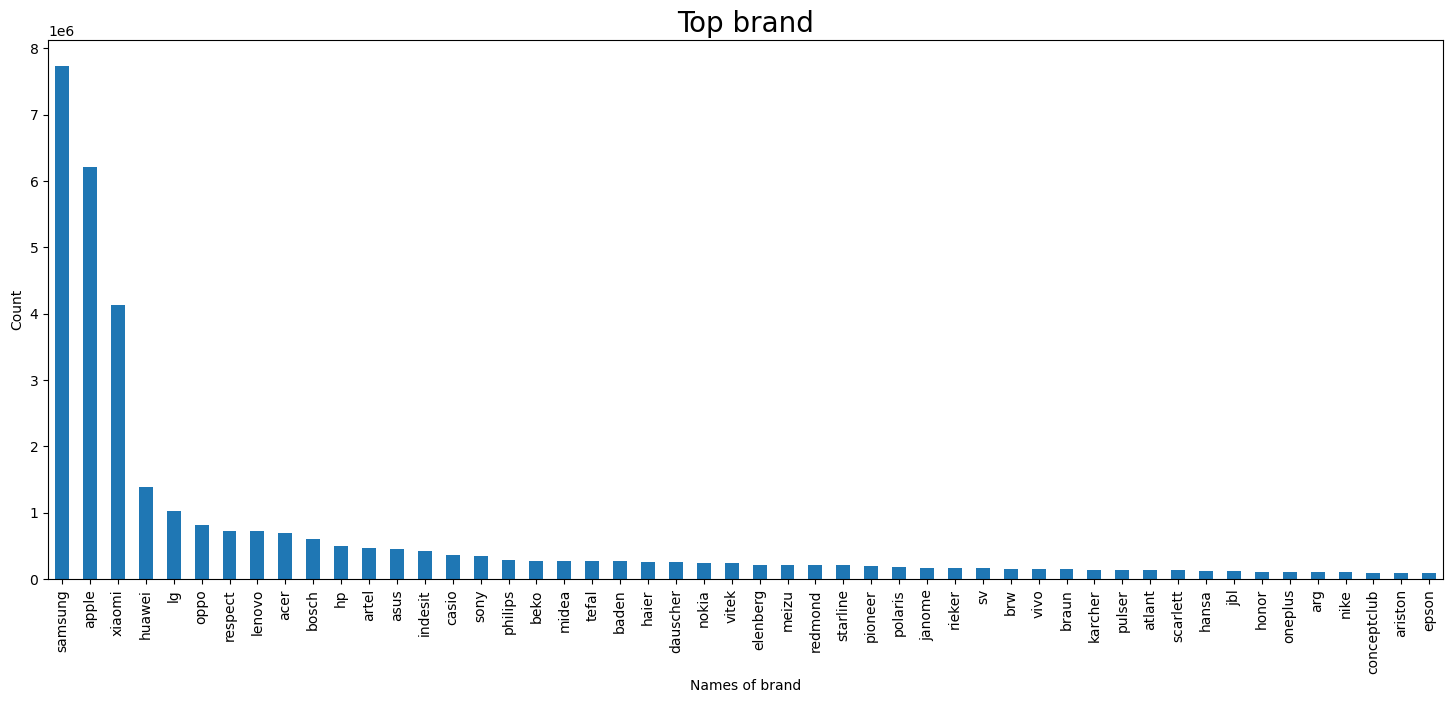

In [21]:
df['brand'].value_counts().head(50).plot.bar(figsize = (18,7))
plt.title('Top brand',fontsize = 20)
plt.xlabel('Names of brand')
plt.ylabel('Count')
plt.show()

<AxesSubplot:>

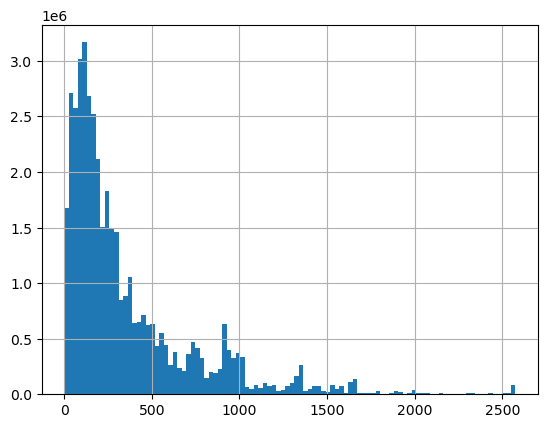

In [22]:
df.price.hist(bins=100)

In [23]:
only_purchases = type_time.loc[type_time.event_type == 'purchase']
only_cart = type_time.loc[type_time.event_type == 'cart']
only_view = type_time.loc[type_time.event_type == 'view']

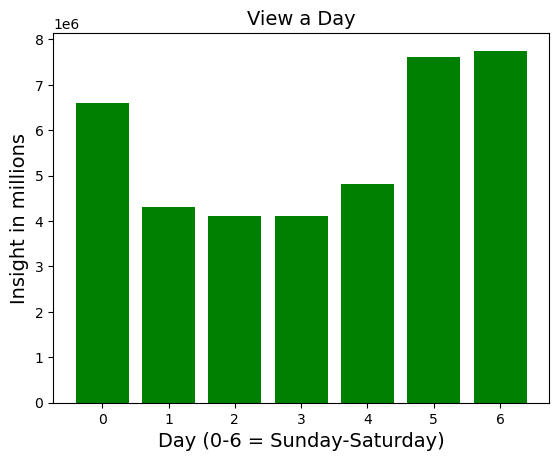

In [25]:
plt.bar(only_view['event_time'], only_view['total'],color='green')
plt.title('View a Day', fontsize=14)
plt.xlabel('Day (0-6 = Sunday-Saturday)', fontsize=14)
plt.ylabel('Insight in millions', fontsize=14)
plt.show()

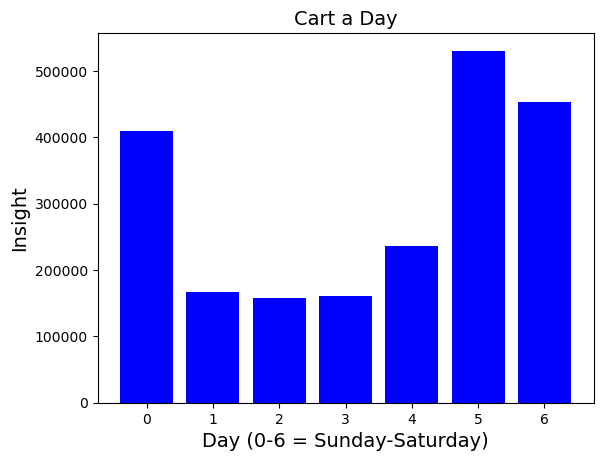

In [26]:
plt.bar(only_cart['event_time'],only_cart['total'],color='blue')
plt.title('Cart a Day', fontsize=14)
plt.xlabel('Day (0-6 = Sunday-Saturday)', fontsize=14)
plt.ylabel('Insight', fontsize=14)
plt.show()

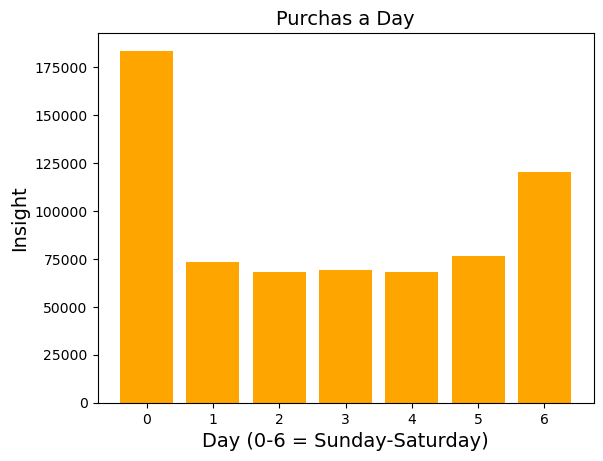

In [27]:
plt.bar(only_purchases['event_time'],only_purchases['total'],color='orange')
plt.title('Purchas a Day', fontsize=14)
plt.xlabel('Day (0-6 = Sunday-Saturday)', fontsize=14)
plt.ylabel('Insight', fontsize=14)
plt.show()

## Feature Engineering

In [28]:
df.isna().sum() 

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

In [29]:
df['price'].astype(str).str.split(".", "")

0          NaN
1          NaN
3          NaN
4          NaN
5          NaN
            ..
67501972   NaN
67501975   NaN
67501976   NaN
67501977   NaN
67501978   NaN
Name: price, Length: 42089564, dtype: float64

In [30]:
df['price']

0            489.07
1            293.65
3            712.87
4            183.27
5            360.09
             ...   
67501972     266.16
67501975      62.81
67501976     167.03
67501977     566.27
67501978    1312.52
Name: price, Length: 42089564, dtype: float64

In [32]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,5,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,5,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
3,5,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,5,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
5,5,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c


In [33]:
new = []
for i in df['category_code'].str.split('.',2):
    new.append(i[0])    
df.insert(4, 'general_category', new)

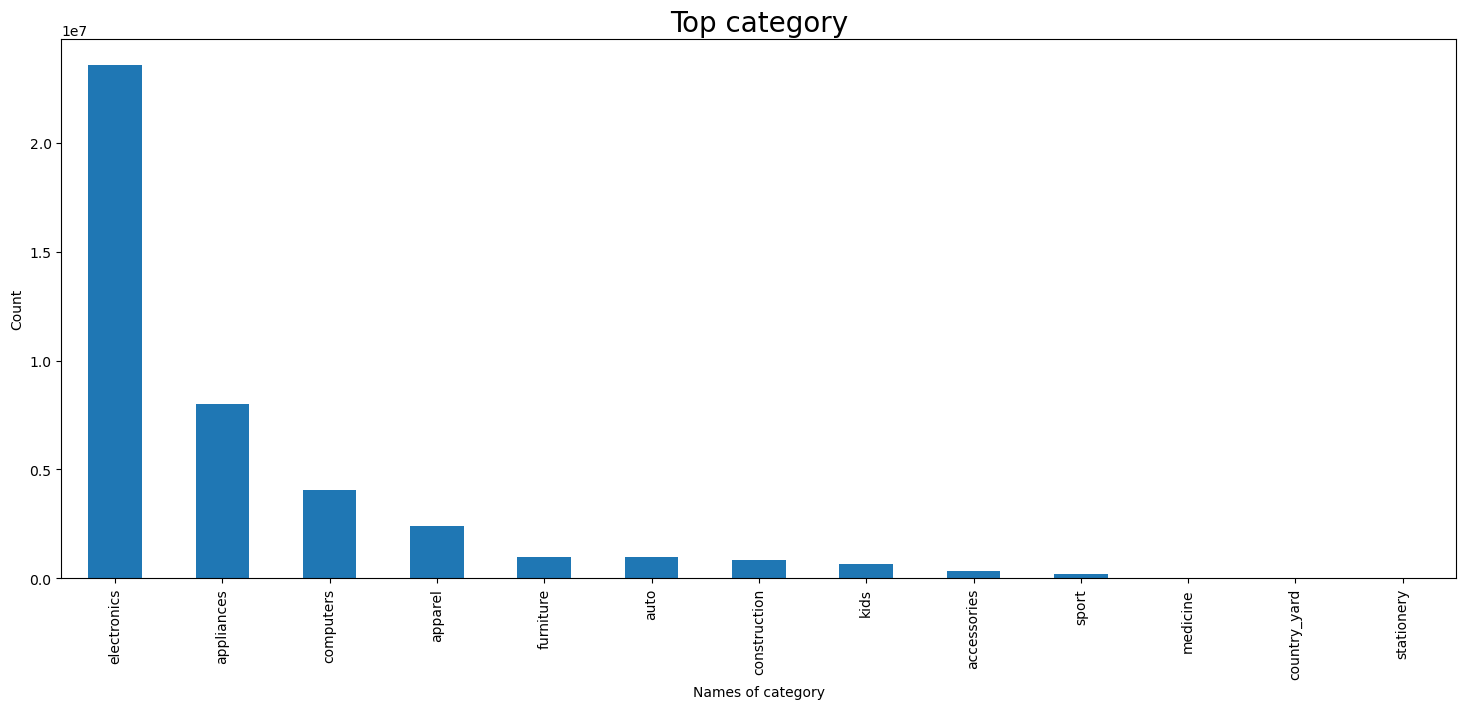

In [34]:
df['general_category'].value_counts().head(20).plot.bar(figsize = (18,7))
plt.title('Top category',fontsize = 20)
plt.xlabel('Names of category')
plt.ylabel('Count')
plt.show()

In [35]:
# Session sayısı
columns_with_session = ['event_type', 'product_id', 'user_id', 'user_session']
session_click_df = df.groupby(columns_with_session)['product_id'].size().reset_index(name='session_count')
session_click_df.head()

,event_type,product_id,user_id,user_session,session_count
0,cart,1000978,512405575,fc0f0c93-fc59-4aab-8eb4-a63a42e2db31,1
1,cart,1000978,512691979,285ef931-2e43-434a-9bdf-90437a48eeb1,1
2,cart,1000978,512823814,8c090e47-7b16-44c4-9f13-588147251726,1
3,cart,1000978,515502232,259c58f7-7f54-493e-824f-89fd3f311460,1
4,cart,1000978,515514138,6f6ab8ae-3c98-4402-93af-f357ed3a81e1,1


In [36]:
session_click_pivot_df = pd.pivot_table(session_click_df, values='session_count', 
                                        index=['product_id', 'user_id', 'user_session'], 
                                        columns=['event_type'], fill_value=0).reset_index()
session_click_pivot_df.head()

event_type,product_id,user_id,user_session,cart,purchase,view
0,1000365,525766088,a22f1cbe-5106-4ba0-8733-49d2d19f7176,0,0,1
1,1000978,424872790,64ffc819-5f6c-4d33-a2c4-e39f48bc6d98,0,0,1
2,1000978,442462854,19d676a5-e611-499e-955e-202bb297a927,0,0,1
3,1000978,442462854,9a2118e2-d1eb-4371-b19c-9be0cd49e131,0,0,2
4,1000978,442462854,b30e0ba5-609d-4387-841f-d4221b433a6e,0,0,1


In [37]:
columns_without_session = ['event_type', 'product_id', 'user_id']
total_click_df = df.groupby(columns_without_session)['product_id'].size().reset_index(name='total_count')
total_click_df.head()

,event_type,product_id,user_id,total_count
0,cart,1000978,512405575,1
1,cart,1000978,512691979,1
2,cart,1000978,512823814,1
3,cart,1000978,515502232,1
4,cart,1000978,515514138,2


In [38]:
total_click_pivot_df = pd.pivot_table(total_click_df, values='total_count', index=['product_id', 'user_id'], 
                                      columns=['event_type'], fill_value=0).reset_index()
total_click_pivot_df.head()

event_type,product_id,user_id,cart,purchase,view
0,1000365,525766088,0,0,1
1,1000978,424872790,0,0,1
2,1000978,442462854,0,0,8
3,1000978,460216566,0,0,1
4,1000978,460263198,0,0,2


In [39]:
click_merged = session_click_pivot_df.merge(total_click_pivot_df, how='left', on=['product_id', 'user_id'])

In [40]:
click_merged.rename(columns={"cart_x":"session_cart", "view_x":"session_view", "purchase_x":"session_purchase",
                            "cart_y":"total_cart", "view_y":"total_view", "purchase_y":"total_purchase"}, inplace=True)

In [41]:
click_merged

event_type,product_id,user_id,user_session,session_cart,session_purchase,session_view,total_cart,total_purchase,total_view
0,1000365,525766088,a22f1cbe-5106-4ba0-8733-49d2d19f7176,0,0,1,0,0,1
1,1000978,424872790,64ffc819-5f6c-4d33-a2c4-e39f48bc6d98,0,0,1,0,0,1
2,1000978,442462854,19d676a5-e611-499e-955e-202bb297a927,0,0,1,0,0,8
3,1000978,442462854,9a2118e2-d1eb-4371-b19c-9be0cd49e131,0,0,2,0,0,8
4,1000978,442462854,b30e0ba5-609d-4387-841f-d4221b433a6e,0,0,1,0,0,8
...,...,...,...,...,...,...,...,...,...
25222150,100028391,573916019,b95147bf-82dd-49f8-b1a4-29b7f6c55b8b,0,0,2,0,0,2
25222151,100028391,579699970,01731b47-cd40-409f-a222-f256f64d410a,0,0,1,0,0,1
25222152,100028398,512940873,53491dda-647c-41ff-9687-003f48e00d9f,0,0,1,0,0,1
25222153,100028398,519205561,0566d0d2-1e6b-415c-8662-120f09e9abe4,0,0,3,0,0,3


----------------------